# Contents
1. Imports
2. Checks
3. Derive New Variables
4. Exports

# 1. Imports

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# Import path
path = r'/Users/davidgriesel/Documents/0 - Analytics Projects/Online Grocery Store'

In [4]:
# Dataset
df_dataset = pd.read_pickle(os.path.join(path, '02 - Data', 'Prepared Data', 'final_dataset_5.pkl'))

# 2. Checks

In [8]:
#Dimensions
df_dataset.shape

(32403719, 42)

In [10]:
# Preview
df_dataset.head()

,order_id,user_id,user_order_count,order_day_of_week,order_hour_of_day,days_since_last_order,is_first_order,product_id,add_to_cart_order,reordered,...,activity_score,frequency_score,total_loyalty_score,loyalty_flag,region,age_profile,income_profile,parental_status,family_status,product_category
0,2539329,1,1,2,8,NaN,True,196,1,0,...,1,1,4,Low Loyalty,South,Adult,Low Income,parent,Family,beverages
1,2539329,1,1,2,8,NaN,True,14084,2,0,...,1,1,4,Low Loyalty,South,Adult,Low Income,parent,Family,perishables
2,2539329,1,1,2,8,NaN,True,12427,3,0,...,1,1,4,Low Loyalty,South,Adult,Low Income,parent,Family,non-perishables
3,2539329,1,1,2,8,NaN,True,26088,4,0,...,1,1,4,Low Loyalty,South,Adult,Low Income,parent,Family,non-perishables
4,2539329,1,1,2,8,NaN,True,26405,5,0,...,1,1,4,Low Loyalty,South,Adult,Low Income,parent,Family,household


# 3. Ordering habits

## 3.1.1. Order Distribution - Day of the Week

In [14]:
# Values to plot
df_dataset['order_day_of_week'].value_counts(dropna = False).sort_index()

order_day_of_week
0    6203898
1    5660040
2    4213690
3    3840418
4    3783706
5    4205651
6    4496316
Name: count, dtype: int64

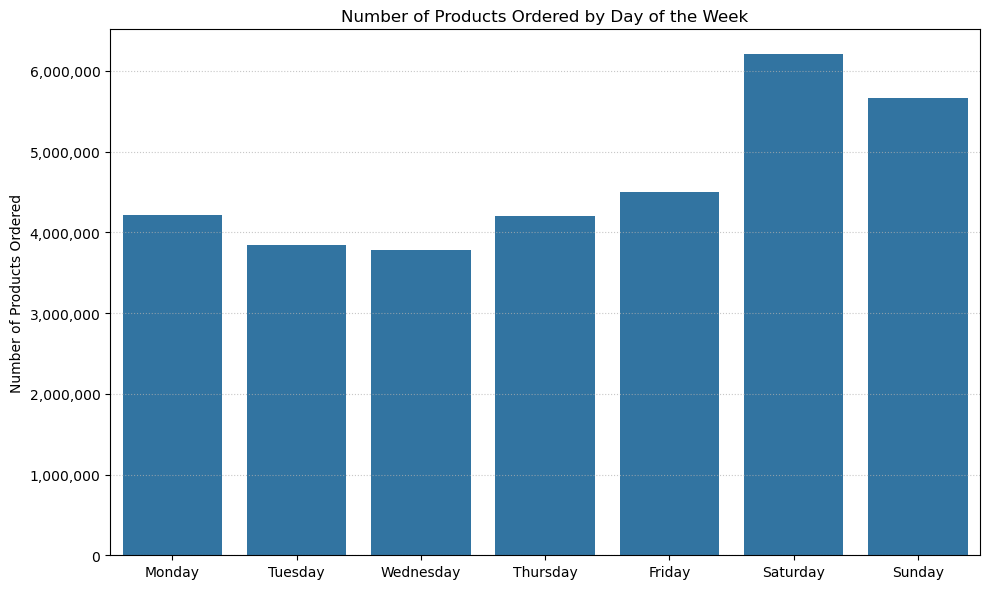

Chart successfully saved at: /Users/davidgriesel/Documents/0 - Analytics Projects/Online Grocery Store


In [25]:
# Define the mapping of numeric days to weekday names in chronological order
day_mapping = {0: "Saturday", 1: "Sunday", 2: "Monday", 3: "Tuesday", 
               4: "Wednesday", 5: "Thursday", 6: "Friday"}

# Count occurrences of each day of the week
order_counts = df_dataset['order_day_of_week'].value_counts().reset_index()
order_counts.columns = ['order_day_of_week', 'count']

# Sort by the numeric order of days (0-6) before mapping names
order_counts = order_counts.sort_values(by='order_day_of_week')
order_counts['order_day_of_week'] = order_counts['order_day_of_week'].map(day_mapping)

# Define the order for the x-axis to ensure correct weekday sequence
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Create figure and axis
plt.figure(figsize=(10, 6))

# Plot the bar chart
sns.barplot(data=order_counts, x='order_day_of_week', y='count', order=weekday_order)

# Set the title and labels
plt.title('Number of Products Ordered by Day of the Week')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
plt.savefig(os.path.join(path, '04 - Analysis/Visualisations', '3.1.1_order_dow.png'), dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {path}")

## 3.1.2. Order Distribution - Time of Day

In [21]:
# Values to plot
df_dataset['order_hour_of_day'].value_counts(dropna = False).sort_index()

order_hour_of_day
0      218763
1      115698
2       69373
3       51281
4       53240
5       87957
6      290491
7      891026
8     1718082
9     2454127
10    2761660
11    2736010
12    2618430
13    2660846
14    2689036
15    2662044
16    2535106
17    2087564
18    1636436
19    1258275
20     976134
21     795619
22     634207
23     402314
Name: count, dtype: int64

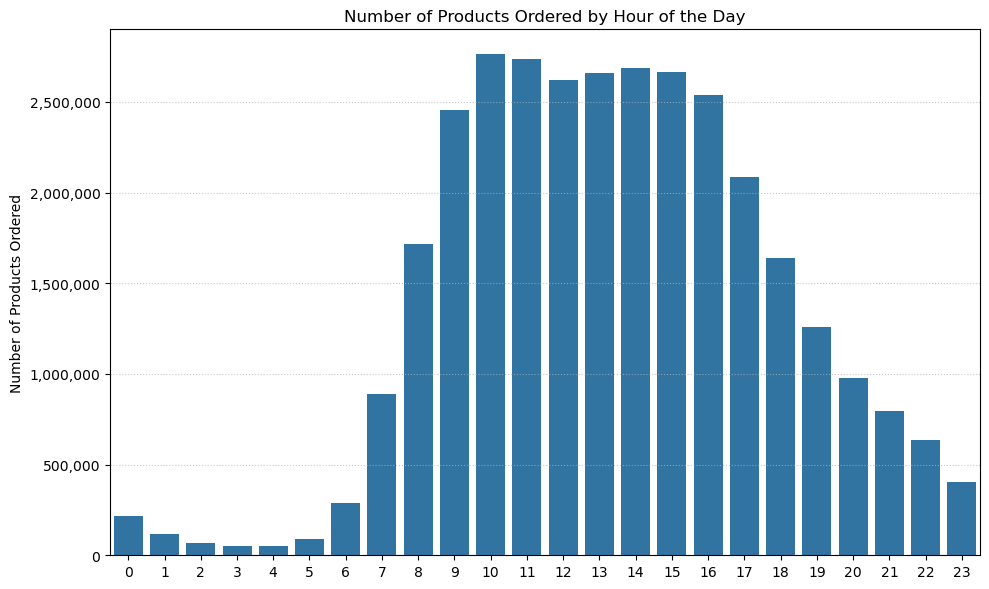

Chart successfully saved at: /Users/davidgriesel/Documents/0 - Analytics Projects/Online Grocery Store


In [27]:
# Count occurrences of each hour of the day
order_counts = df_dataset['order_hour_of_day'].value_counts().reset_index()
order_counts.columns = ['order_hour_of_day', 'count']

# Sort by the hour of the day (0-23)
order_counts = order_counts.sort_values(by='order_hour_of_day')

# Create figure and axis
plt.figure(figsize=(10, 6))

# Plot the bar chart
sns.barplot(data=order_counts, x='order_hour_of_day', y='count')

# Set the title and labels
plt.title('Number of Products Ordered by Hour of the Day')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
plt.savefig(os.path.join(path, '04 - Analysis/Visualisations', '3.1.2_order_tod.png'), dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {path}")

## 3.2.1. Sales Distribution - Day of the Week

In [17]:
# Values to plot
df_dataset.groupby('order_day_of_week', as_index=False)['prices'].mean() 

,order_day_of_week,prices
0,0,7.858536
1,1,7.760793
2,2,7.755448
3,3,7.758648
4,4,7.757327
5,5,7.763573
6,6,7.858335


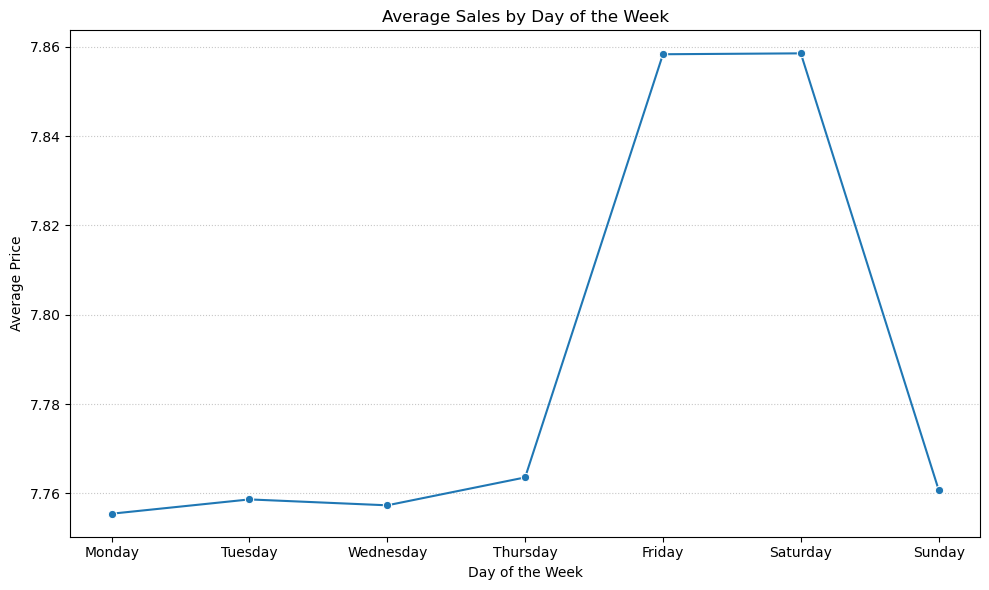

Chart successfully saved at: /Users/davidgriesel/Documents/0 - Analytics Projects/Online Grocery Store


In [18]:
# Define the mapping of numeric days to weekday names in chronological order
day_mapping = {0: "Saturday", 1: "Sunday", 2: "Monday", 3: "Tuesday", 
               4: "Wednesday", 5: "Thursday", 6: "Friday"}

# Aggregate the dataset to get the mean price per order day
df_agg = df_dataset.groupby('order_day_of_week', as_index=False)['prices'].mean()

# Sort by numeric order of days (0-6) and map to weekday names
df_agg = df_agg.sort_values('order_day_of_week')
df_agg['order_day_of_week'] = df_agg['order_day_of_week'].map(day_mapping)

# Define the order for the x-axis to ensure correct weekday sequence
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Ensure correct ordering by defining categorical type
df_agg['order_day_of_week'] = pd.Categorical(df_agg['order_day_of_week'], categories=weekday_order, ordered=True)

# Sort by categorical order
df_agg = df_agg.sort_values('order_day_of_week')

# Create figure and axis
plt.figure(figsize=(10, 6))

# Plot the bar chart
sns.lineplot(data=df_agg, x='order_day_of_week', y='prices', marker='o')

# Add title and axis labels
plt.title('Average Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Price')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.2f}'))

# Add gridlines for y-axis
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
plt.savefig(os.path.join(path, '04 - Analysis/Visualisations', '3.2.1_sales_dow.png'), dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {path}")

## 3.2.2. Sales Distribution - Time of Day

In [20]:
# Values to plot
df_dataset.groupby('order_hour_of_day', as_index=False)['prices'].mean()

,order_hour_of_day,prices
0,0,7.812012
1,1,7.806767
2,2,7.800565
3,3,7.829798
4,4,7.839887
5,5,7.829466
6,6,7.818757
7,7,7.820985
8,8,7.791439
9,9,7.754539


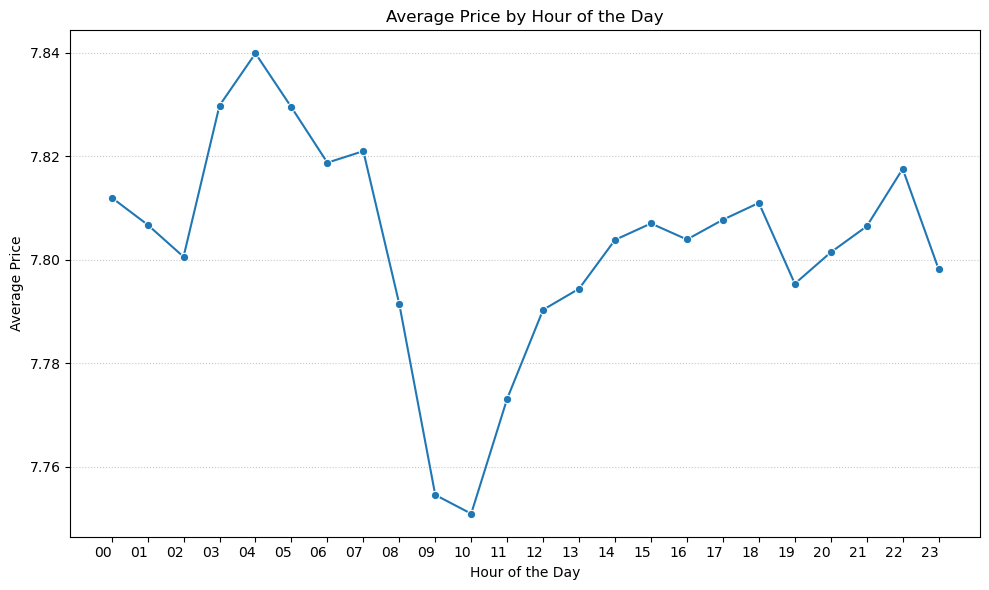

Chart successfully saved at: /Users/davidgriesel/Documents/0 - Analytics Projects/Online Grocery Store


In [21]:
# Aggregate the dataset to get the mean price per order hour
df_agg = df_dataset.groupby('order_hour_of_day', as_index=False)['prices'].mean()

# Create figure and axis
plt.figure(figsize=(10, 6))

# Plot the bar chart
sns.lineplot(data=df_agg, x='order_hour_of_day', y='prices', marker='o', linestyle='-')

# Add title and axis labels
plt.title('Average Price by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Price')

# Improve x-axis labels to reflect 24-hour format (00:00, 01:00, ..., 23:00)
tick_positions = range(0, 24, 1)  # Show every hour
tick_labels = [f"{hour:02d}" for hour in tick_positions]  # Format as "00:00", "01:00", etc.
#tick_labels = [f"{hour:02d}:00" for hour in tick_positions]  # Format as "00:00", "01:00", etc.
plt.xticks(tick_positions, tick_labels, rotation=45, ha='right')  # Rotate for readability

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.2f}'))

# Rotate x-ticks for better readability
plt.xticks(rotation=0)

# Add gridlines
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
plt.savefig(os.path.join(path, '04 - Analysis/Visualisations', '3.2.2_sales_tod.png'), dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {path}")

## 3.3.1. Price Distribution - Products

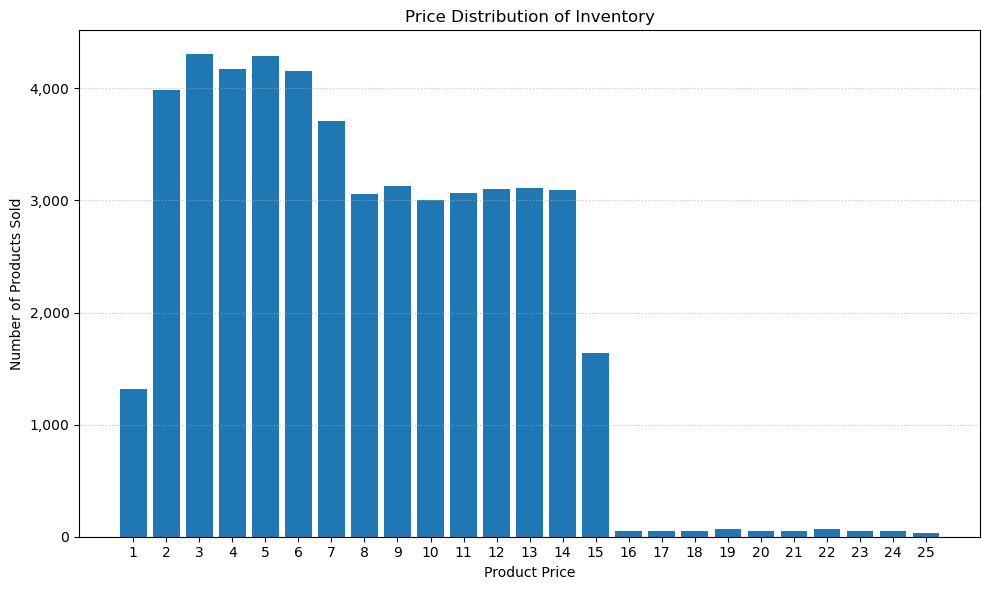

Chart successfully saved at: /Users/davidgriesel/Documents/0 - Analytics Projects/Online Grocery Store


In [23]:
# Define bins based on the range of prices
prod_price = df_dataset.groupby('product_id', as_index=False)['prices'].max()
bins = np.arange(prod_price['prices'].min() - 0.5, prod_price['prices'].max() + 1.5, 1)  # Ensure bins cover full range

# Create figure and axis
plt.figure(figsize=(10, 6))

# Plot histogram
plt.hist(prod_price['prices'], bins=bins, rwidth=0.8)

# Set title and axis labels
plt.title('Price Distribution of Inventory')
plt.xlabel('Product Price')
plt.ylabel('Number of Products Sold')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Adjust x-ticks to be centered in each bin
tick_positions = (bins[:-1] + bins[1:]) / 2  # Middle of each bin
plt.xticks(tick_positions, rotation=0)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Improve layout for readability
plt.tight_layout()

# Save the figure before displaying
plt.savefig(os.path.join(path, '04 - Analysis/Visualisations', '3.3.1_price_prods.png'), dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {path}")

## 3.3.2. Price Distribution - Sales

In [25]:
# Values to plot
df_dataset['prices'].value_counts(dropna = False).sort_index()

prices
1.0     115143
1.1     242782
1.2     256258
1.3     425691
1.4     392209
         ...  
24.6      1962
24.7      7283
24.8       410
24.9      5781
25.0     13772
Name: count, Length: 241, dtype: int64

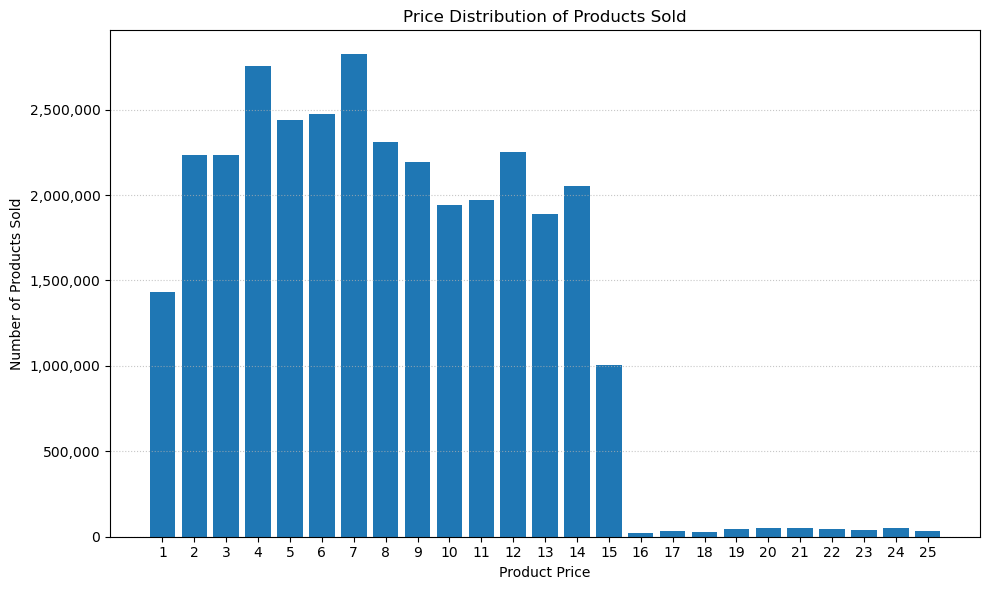

Chart successfully saved at: /Users/davidgriesel/Documents/0 - Analytics Projects/Online Grocery Store


In [26]:
# Define bins based on the range of prices
bins = np.arange(df_dataset['prices'].min() - 0.5, df_dataset['prices'].max() + 1.5, 1)  # Ensure full range coverage

# Create figure and axis
plt.figure(figsize=(10, 6))

# Plot histogram
plt.hist(df_dataset['prices'], bins=bins, rwidth=0.8)

# Set title and axis labels
plt.title('Price Distribution of Products Sold')
plt.xlabel('Product Price')
plt.ylabel('Number of Products Sold')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Adjust x-ticks to be centered in each bin
tick_positions = (bins[:-1] + bins[1:]) / 2  # Middle of each bin
plt.xticks(tick_positions, rotation=0)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Improve layout for readability
plt.tight_layout()

# Save the figure before displaying
plt.savefig(os.path.join(path, '04 - Analysis/Visualisations', '3.3.2_price_sales.png'), dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {path}")

## 3.4.1. Order Distribution - Department

In [28]:
# Values to plot
df_dataset[['department_id', 'department']].value_counts(dropna = False).sort_index()

department_id  department     
1              frozen             2234743
2              other                36291
3              bakery             1172428
4              produce            9479291
5              alcohol             153696
6              international       269253
7              beverages          2688115
8              pets                 97716
9              dry goods pasta     866627
10             bulk                 34573
11             personal care       447010
12             meat seafood        708927
13             pantry             1875369
14             breakfast           703033
15             canned goods       1068058
16             dairy eggs         5398185
17             household           738666
18             babies              423794
19             snacks             2887550
20             deli               1051249
21             missing              69145
Name: count, dtype: int64

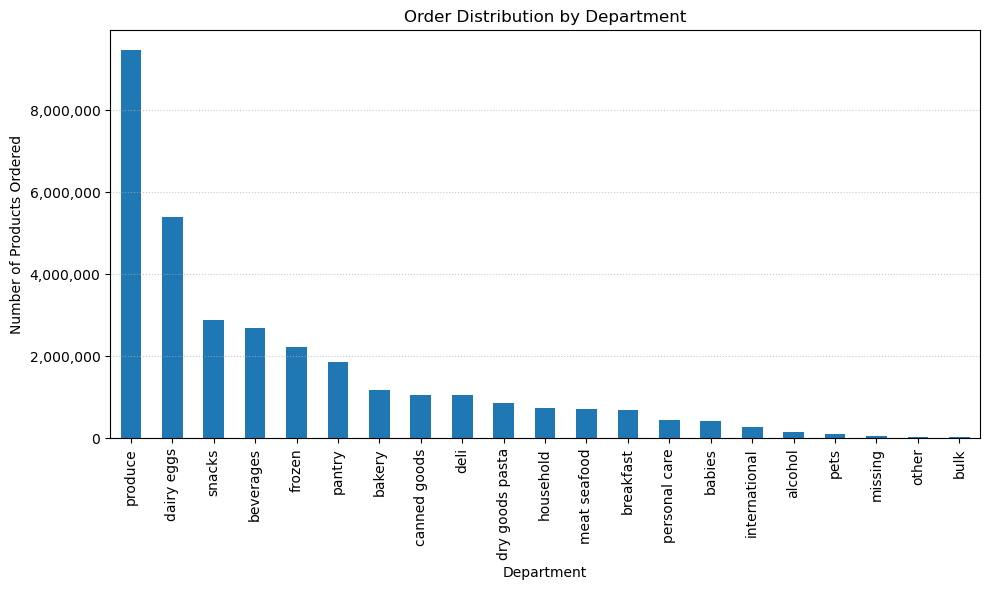

Chart successfully saved at: /Users/davidgriesel/Documents/0 - Analytics Projects/Online Grocery Store


In [29]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create a bar chart using department counts
order_counts = df_dataset['department'].value_counts(ascending=False).plot.bar(ax=ax)

# Set title and labels
plt.title('Order Distribution by Department')
plt.xlabel('Department')
plt.ylabel('Number of Products Ordered')

# Format y-axis with thousands separator
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Add dotted gridlines on the y-axis
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Improve layout for readability
plt.tight_layout()

# Save the figure before displaying
plt.savefig(os.path.join(path, '04 - Analysis/Visualisations', '3.4.1_order_depts.png'), dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {path}")

## 3.4.2. Order Distribution - Product Category

In [31]:
# Values to plot
df_dataset['product_category'].value_counts(dropna = False).sort_index()

product_category
alcoholic beverages      153696
babies                   423794
beverages               2688115
household                738666
miscellaneous            374689
non-perishables         9669953
perishables            17810080
personal care            447010
pets                      97716
Name: count, dtype: int64

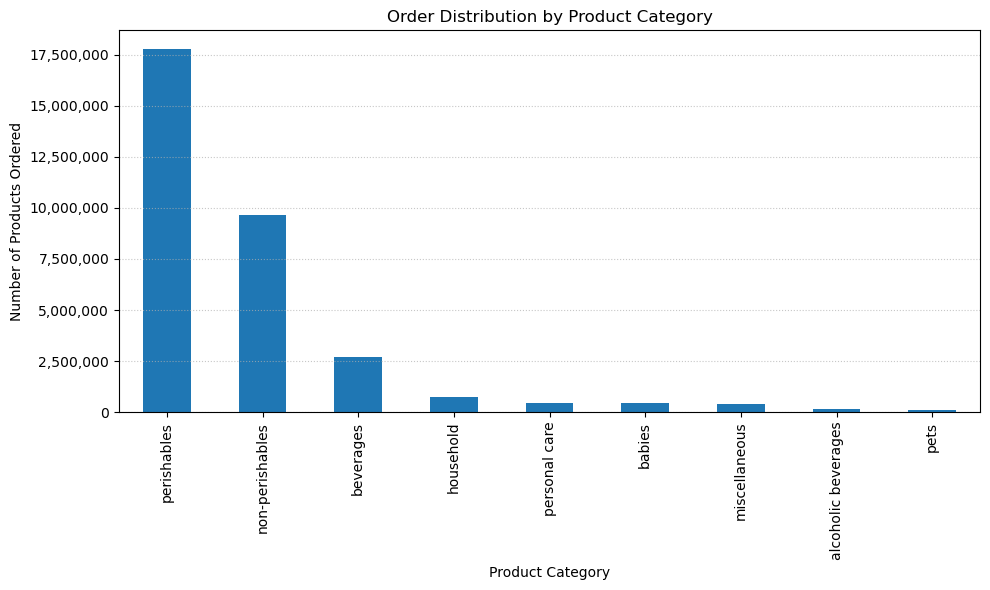

Chart successfully saved at: /Users/davidgriesel/Documents/0 - Analytics Projects/Online Grocery Store


In [32]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create a bar chart using department counts
order_counts = df_dataset['product_category'].value_counts(ascending=False).plot.bar(ax=ax)

# Set title and labels
plt.title('Order Distribution by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Number of Products Ordered')

# Format y-axis with thousands separator
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Add dotted gridlines on the y-axis
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Improve layout for readability
plt.tight_layout()

# Save the figure before displaying
plt.savefig(os.path.join(path, '04 - Analysis/Visualisations', '3.4.2_order_prod.png'), dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {path}")

# 4. Distribution - Customer Profiles

## 4.1. Customer Distribution - Activity Flag

In [35]:
# Group by activity_flag and count unique user_id
unique_user_counts = df_dataset.groupby('activity_flag')['user_id'].nunique().reset_index()
unique_user_counts.columns = ['activity_flag', 'unique_users']

# Add a row for the total sum of unique users
total_row = pd.DataFrame({'activity_flag': ['Total'], 'unique_users': [unique_user_counts['unique_users'].sum()]})
unique_user_counts = pd.concat([unique_user_counts, total_row], ignore_index=True)

# Display the table
unique_user_counts

,activity_flag,unique_users
0,High Activity,12043
1,Low Activity,131129
2,Moderate Activity,63037
3,Total,206209


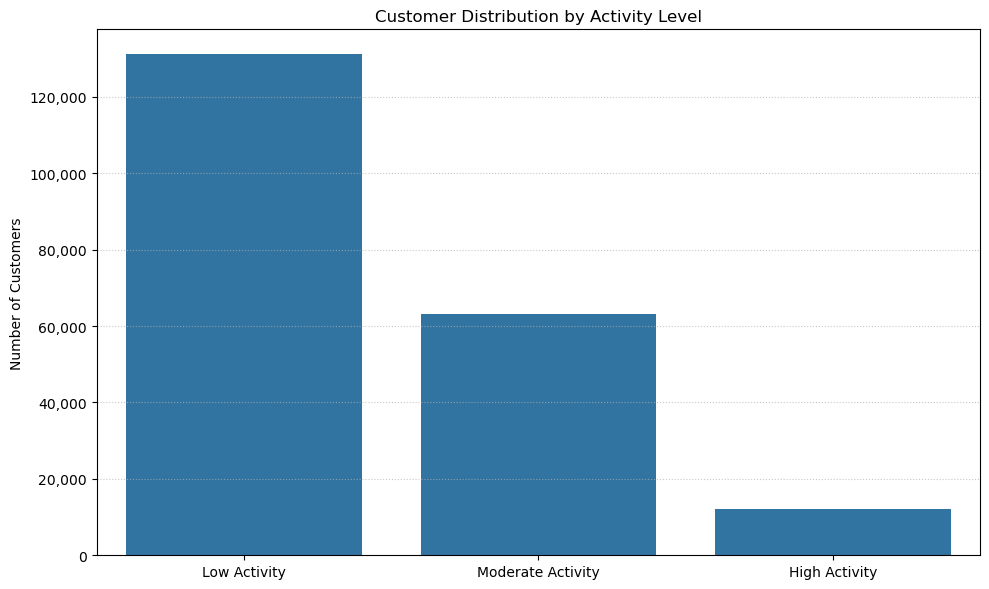

Chart successfully saved at: /Users/davidgriesel/Documents/0 - Analytics Projects/Online Grocery Store


In [36]:
# Define custom order for activity levels
activity_order = ["Low Activity", "Moderate Activity", "High Activity"]

# Count occurrences of each activity flag
activity_counts = df_dataset.groupby('activity_flag')['user_id'].nunique().reset_index()
activity_counts.columns = ['activity_flag', 'count']

# Ensure sorting by predefined order
activity_counts['activity_flag'] = pd.Categorical(
    activity_counts['activity_flag'], categories=activity_order, ordered=True
)
activity_counts = activity_counts.sort_values('activity_flag')

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bar chart with sorted order
sns.barplot(data=activity_counts, x='activity_flag', y='count', order=activity_order, ax=ax)

# Set the title and labels
plt.title('Customer Distribution by Activity Level')
plt.xlabel('')
plt.ylabel('Number of Customers')

# Format y-axis with thousands separator
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Add dotted gridlines on the y-axis
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Improve layout for readability
plt.tight_layout()

# Save the figure before displaying
plt.savefig(os.path.join(path, '04 - Analysis/Visualisations', '4.1_cust_dist_activity.png'), dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {path}")

## 4.2 Customer Distribution - Spending Flag

In [38]:
# Group by activity_flag and count unique user_id
unique_user_counts = df_dataset.groupby('spending_flag')['user_id'].nunique().reset_index()
unique_user_counts.columns = ['spending_flag', 'unique_users']

# Add a row for the total sum of unique users
total_row = pd.DataFrame({'spending_flag': ['Total'], 'unique_users': [unique_user_counts['unique_users'].sum()]})
unique_user_counts = pd.concat([unique_user_counts, total_row], ignore_index=True)

# Display the table
unique_user_counts

,spending_flag,unique_users
0,High Spender,60792
1,Low Spender,62889
2,Moderate Spender,82506
3,Premium Spender,22
4,Total,206209


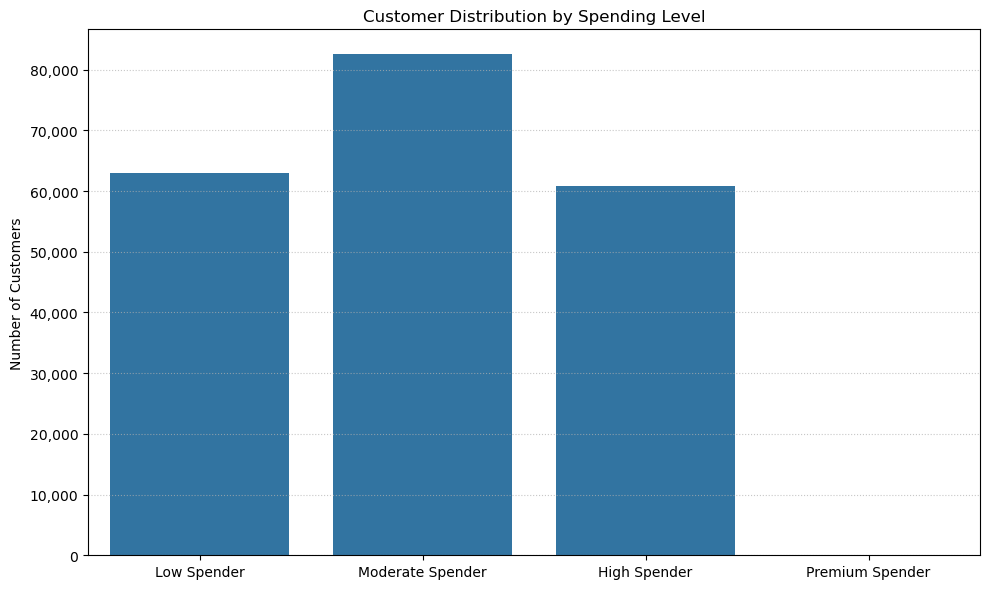

Chart successfully saved at: /Users/davidgriesel/Documents/0 - Analytics Projects/Online Grocery Store


In [167]:
# Define custom order for activity levels
spending_order = ["Low Spender", "Moderate Spender", "High Spender", "Premium Spender"]

# Count occurrences of each activity flag
spending_counts = df_dataset.groupby('spending_flag')['user_id'].nunique().reset_index()
spending_counts.columns = ['spending_flag', 'count']

# Ensure sorting by predefined order
spending_counts['spending_flag'] = pd.Categorical(
    spending_counts['spending_flag'], categories=spending_order, ordered=True
)
spending_counts = spending_counts.sort_values('spending_flag')

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bar chart with sorted order
sns.barplot(data=spending_counts, x='spending_flag', y='count', order=spending_order, ax=ax)

# Set the title and labels
plt.title('Customer Distribution by Spending Level')
plt.xlabel('')
plt.ylabel('Number of Customers')

# Format y-axis with thousands separator
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Add dotted gridlines on the y-axis
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Improve layout for readability
plt.tight_layout()

# Save the figure before displaying
plt.savefig(os.path.join(path, '04 - Analysis/Visualisations', '4.2_cust_dist_spending.png'), dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {path}")

## 4.3 Customer Distribution - Frequency Flag

In [41]:
# Group by activity_flag and count unique user_id
unique_user_counts = df_dataset.groupby('frequency_flag')['user_id'].nunique().reset_index()
unique_user_counts.columns = ['frequency_flag', 'unique_users']

# Add a row for the total sum of unique users
total_row = pd.DataFrame({'frequency_flag': ['Total'], 'unique_users': [unique_user_counts['unique_users'].sum()]})
unique_user_counts = pd.concat([unique_user_counts, total_row], ignore_index=True)

# Display the table
unique_user_counts

,frequency_flag,unique_users
0,Frequent Shopper,33888
1,Occasional Shopper,75152
2,Rare Shopper,97169
3,Total,206209


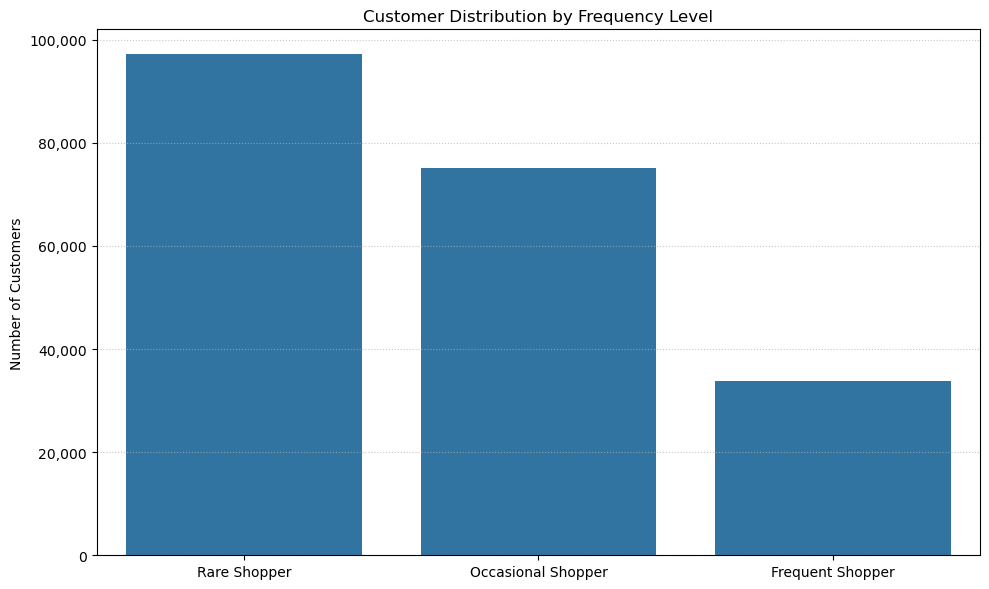

Chart successfully saved at: /Users/davidgriesel/Documents/0 - Analytics Projects/Online Grocery Store


In [42]:
# Define custom order for activity levels
frequency_order = ["Rare Shopper", "Occasional Shopper", "Frequent Shopper"]

# Count occurrences of each activity flag
frequency_counts = df_dataset.groupby('frequency_flag')['user_id'].nunique().reset_index()
frequency_counts.columns = ['frequency_flag', 'count']

# Ensure sorting by predefined order
frequency_counts['frequency_flag'] = pd.Categorical(
    frequency_counts['frequency_flag'], categories=frequency_order, ordered=True
)
frequency_counts = frequency_counts.sort_values('frequency_flag')

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bar chart with sorted order
sns.barplot(data=frequency_counts, x='frequency_flag', y='count', order=frequency_order, ax=ax)

# Set the title and labels
plt.title('Customer Distribution by Frequency Level')
plt.xlabel('')
plt.ylabel('Number of Customers')

# Format y-axis with thousands separator
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Add dotted gridlines on the y-axis
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Improve layout for readability
plt.tight_layout()

# Save the figure before displaying
plt.savefig(os.path.join(path, '04 - Analysis/Visualisations', '4.3_cust_dist_frequency.png'), dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {path}")

## 4.4 Customer Distribution - Loyalty Flag

In [44]:
# Group by activity_flag and count unique user_id
unique_user_counts = df_dataset.groupby('loyalty_flag')['user_id'].nunique().reset_index()
unique_user_counts.columns = ['loyalty_flag', 'unique_users']

# Add a row for the total sum of unique users
total_row = pd.DataFrame({'loyalty_flag': ['Total'], 'unique_users': [unique_user_counts['unique_users'].sum()]})
unique_user_counts = pd.concat([unique_user_counts, total_row], ignore_index=True)

# Display the table
unique_user_counts

,loyalty_flag,unique_users
0,High Loyalty,10971
1,Low Loyalty,72434
2,Moderate Loyalty,122804
3,Total,206209


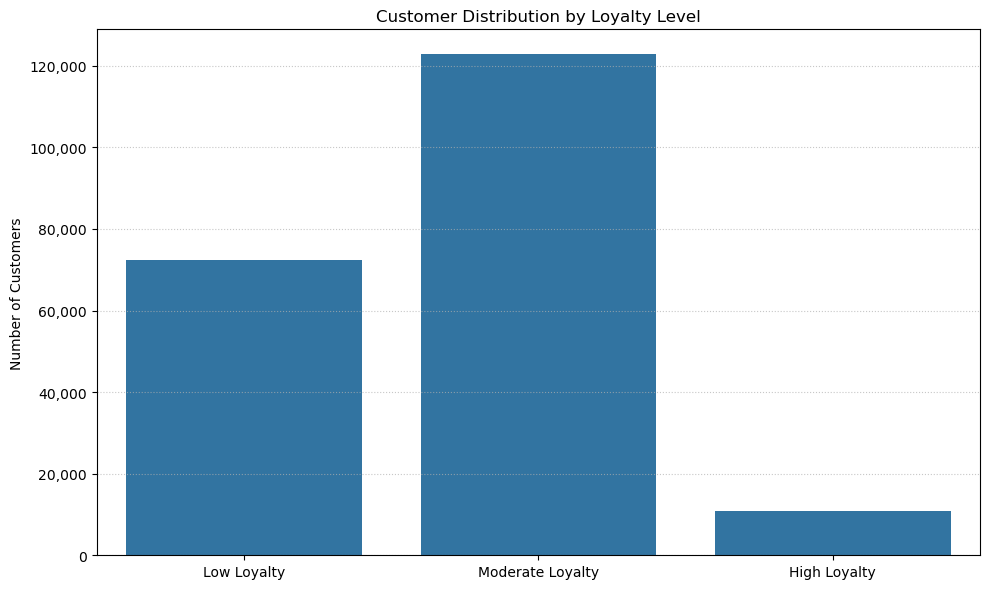

Chart successfully saved at: /Users/davidgriesel/Documents/0 - Analytics Projects/Online Grocery Store


In [45]:
# Define custom order for activity levels
loyalty_order = ["Low Loyalty", "Moderate Loyalty", "High Loyalty"]

# Count occurrences of each activity flag
loyalty_counts = df_dataset.groupby('loyalty_flag')['user_id'].nunique().reset_index()
loyalty_counts.columns = ['loyalty_flag', 'count']

# Ensure sorting by predefined order
loyalty_counts['loyalty_flag'] = pd.Categorical(
    loyalty_counts['loyalty_flag'], categories=loyalty_order, ordered=True
)
loyalty_counts = loyalty_counts.sort_values('loyalty_flag')

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bar chart with sorted order
sns.barplot(data=loyalty_counts, x='loyalty_flag', y='count', order=loyalty_order, ax=ax)

# Set the title and labels
plt.title('Customer Distribution by Loyalty Level')
plt.xlabel('')
plt.ylabel('Number of Customers')

# Format y-axis with thousands separator
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Add dotted gridlines on the y-axis
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Improve layout for readability
plt.tight_layout()

# Save the figure before displaying
plt.savefig(os.path.join(path, '04 - Analysis/Visualisations', '4.4_cust_dist_loyalty.png'), dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {path}")

# 5. Distribution - Customer Demographics 

## 5.1. Customer Distribution - Region

In [48]:
# Group by activity_flag and count unique user_id
unique_user_counts = df_dataset.groupby('region')['user_id'].nunique().reset_index()
unique_user_counts.columns = ['region', 'unique_users']

# Add a row for the total sum of unique users
total_row = pd.DataFrame({'region': ['Total'], 'unique_users': [unique_user_counts['unique_users'].sum()]})
unique_user_counts = pd.concat([unique_user_counts, total_row], ignore_index=True)

# Display the table
unique_user_counts

,region,unique_users
0,Midwest,48519
1,Northeast,36388
2,South,68737
3,West,52565
4,Total,206209


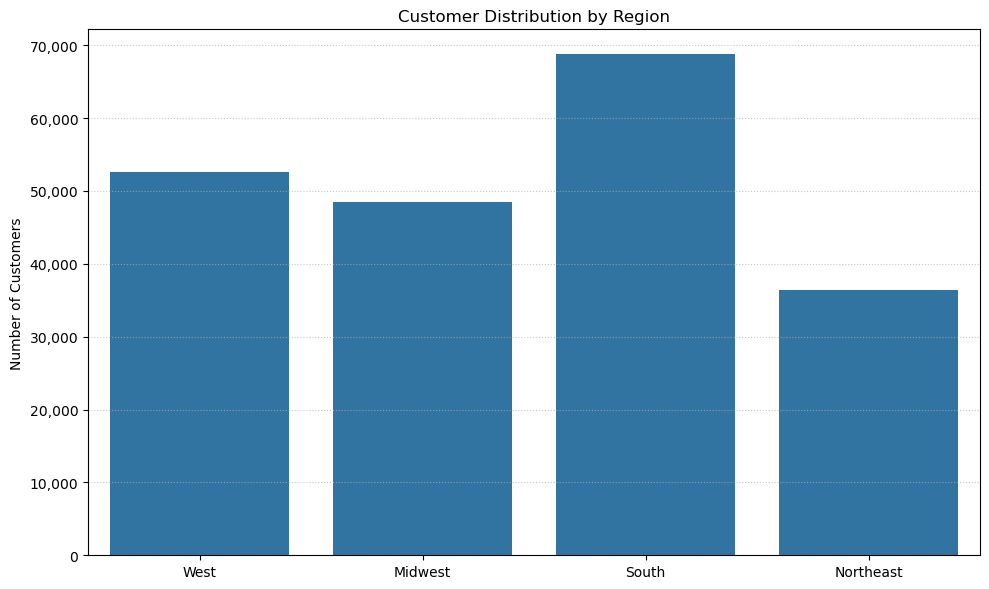

Chart successfully saved at: /Users/davidgriesel/Documents/0 - Analytics Projects/Online Grocery Store


In [49]:
# Define custom order for activity levels
region_order = ["West", "Midwest", "South", "Northeast"]

# Count occurrences of each activity flag
region_counts = df_dataset.groupby('region')['user_id'].nunique().reset_index()
region_counts.columns = ['region', 'count']

# Ensure sorting by predefined order
region_counts['region'] = pd.Categorical(
    region_counts['region'], categories=region_order, ordered=True
)
region_counts = region_counts.sort_values('region')

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bar chart with sorted order
sns.barplot(data=region_counts, x='region', y='count', order=region_order, ax=ax)

# Set the title and labels
plt.title('Customer Distribution by Region')
plt.xlabel('')
plt.ylabel('Number of Customers')

# Format y-axis with thousands separator
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Add dotted gridlines on the y-axis
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Improve layout for readability
plt.tight_layout()

# Save the figure before displaying
plt.savefig(os.path.join(path, '04 - Analysis/Visualisations', '5.1_cust_dist_region.png'), dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {path}")

## 5.2. Customer Distribution - Income

In [51]:
# Group by activity_flag and count unique user_id
unique_user_counts = df_dataset.groupby('income_profile')['user_id'].nunique().reset_index()
unique_user_counts.columns = ['income_profile', 'unique_users']

# Add a row for the total sum of unique users
total_row = pd.DataFrame({'income_profile': ['Total'], 'unique_users': [unique_user_counts['unique_users'].sum()]})
unique_user_counts = pd.concat([unique_user_counts, total_row], ignore_index=True)

# Display the table
unique_user_counts

,income_profile,unique_users
0,High Income,50744
1,Low Income,63160
2,Middle Income,92305
3,Total,206209


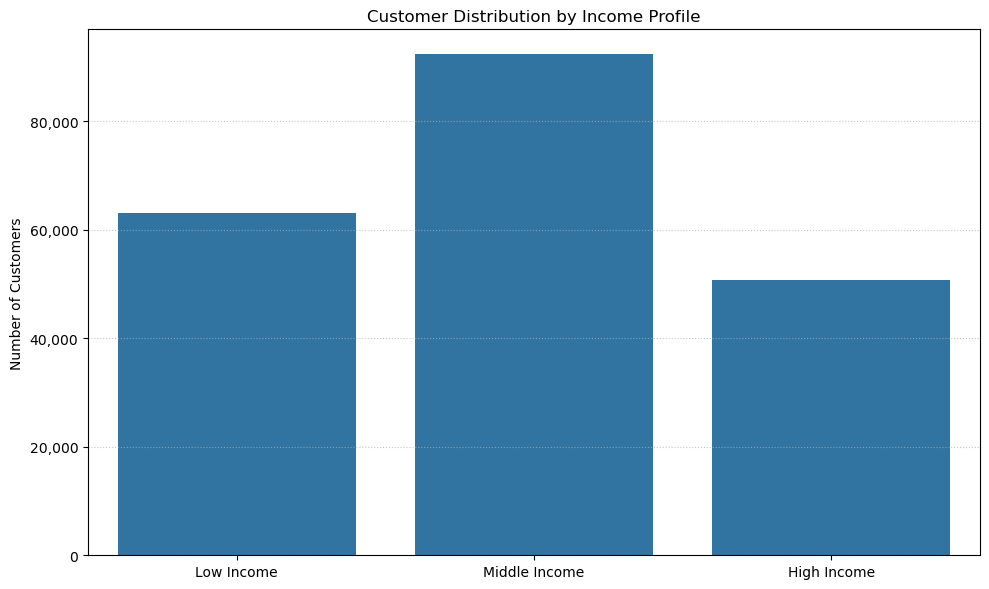

Chart successfully saved at: /Users/davidgriesel/Documents/0 - Analytics Projects/Online Grocery Store


In [52]:
# Define custom order for activity levels
income_order = ["Low Income", "Middle Income", "High Income"]

# Count occurrences of each activity flag
income_counts = df_dataset.groupby('income_profile')['user_id'].nunique().reset_index()
income_counts.columns = ['income_profile', 'count']

# Ensure sorting by predefined order
income_counts['income_profile'] = pd.Categorical(
    income_counts['income_profile'], categories=income_order, ordered=True
)
income_counts = income_counts.sort_values('income_profile')

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bar chart with sorted order
sns.barplot(data=income_counts, x='income_profile', y='count', order=income_order, ax=ax)

# Set the title and labels
plt.title('Customer Distribution by Income Profile')
plt.xlabel('')
plt.ylabel('Number of Customers')

# Format y-axis with thousands separator
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Add dotted gridlines on the y-axis
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Improve layout for readability
plt.tight_layout()

# Save the figure before displaying
plt.savefig(os.path.join(path, '04 - Analysis/Visualisations', '5.2_cust_dist_income.png'), dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {path}")

## 5.3. Customer Distribution - Age

In [54]:
# Group by activity_flag and count unique user_id
unique_user_counts = df_dataset.groupby('age_profile')['user_id'].nunique().reset_index()
unique_user_counts.columns = ['age_profile', 'unique_users']

# Add a row for the total sum of unique users
total_row = pd.DataFrame({'age_profile': ['Total'], 'unique_users': [unique_user_counts['unique_users'].sum()]})
unique_user_counts = pd.concat([unique_user_counts, total_row], ignore_index=True)

# Display the table
unique_user_counts

,age_profile,unique_users
0,Adult,64516
1,Middle Aged,64422
2,Senior,51584
3,Young Adult,25687
4,Total,206209


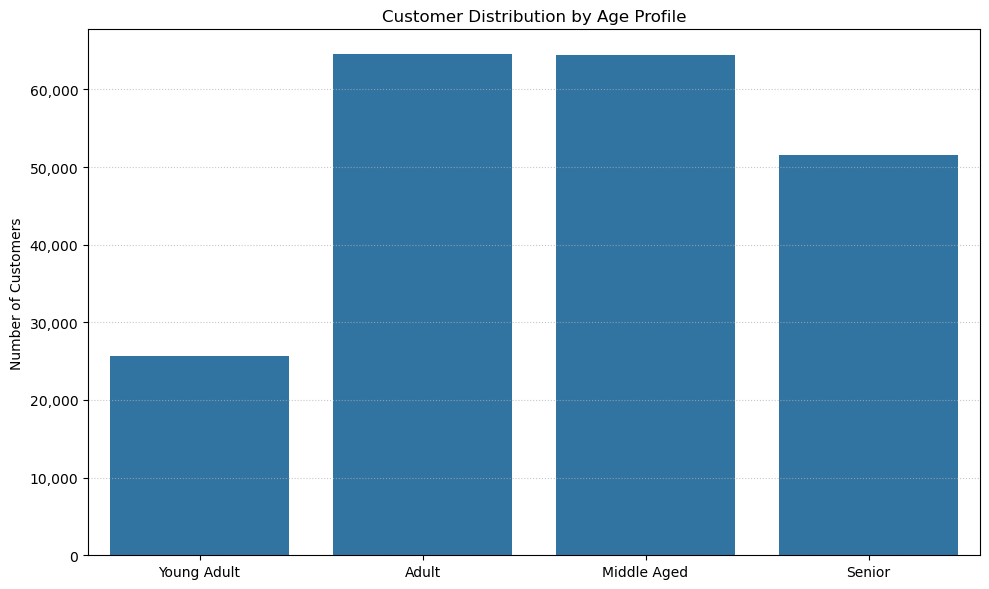

Chart successfully saved at: /Users/davidgriesel/Documents/0 - Analytics Projects/Online Grocery Store


In [55]:
# Define custom order for activity levels
age_order = ["Young Adult", "Adult", "Middle Aged", "Senior"]

# Count occurrences of each activity flag
age_counts = df_dataset.groupby('age_profile')['user_id'].nunique().reset_index()
age_counts.columns = ['age_profile', 'count']

# Ensure sorting by predefined order
age_counts['age_profile'] = pd.Categorical(
    age_counts['age_profile'], categories=age_order, ordered=True
)
age_counts = age_counts.sort_values('age_profile')

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bar chart with sorted order
sns.barplot(data=age_counts, x='age_profile', y='count', order=age_order, ax=ax)

# Set the title and labels
plt.title('Customer Distribution by Age Profile')
plt.xlabel('')
plt.ylabel('Number of Customers')

# Format y-axis with thousands separator
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Add dotted gridlines on the y-axis
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Improve layout for readability
plt.tight_layout()

# Save the figure before displaying
plt.savefig(os.path.join(path, '04 - Analysis/Visualisations', '5.3_cust_dist_age.png'), dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {path}")

## 5.4. Customer Distribution - Family Status

In [57]:
# Group by activity_flag and count unique user_id
unique_user_counts = df_dataset.groupby('family_status')['user_id'].nunique().reset_index()
unique_user_counts.columns = ['family_status', 'unique_users']

# Add a row for the total sum of unique users
total_row = pd.DataFrame({'family_status': ['Total'], 'unique_users': [unique_user_counts['unique_users'].sum()]})
unique_user_counts = pd.concat([unique_user_counts, total_row], ignore_index=True)

# Display the table
unique_user_counts

,family_status,unique_users
0,Family,144906
1,Single Adult,51602
2,Young Parent,9701
3,Total,206209


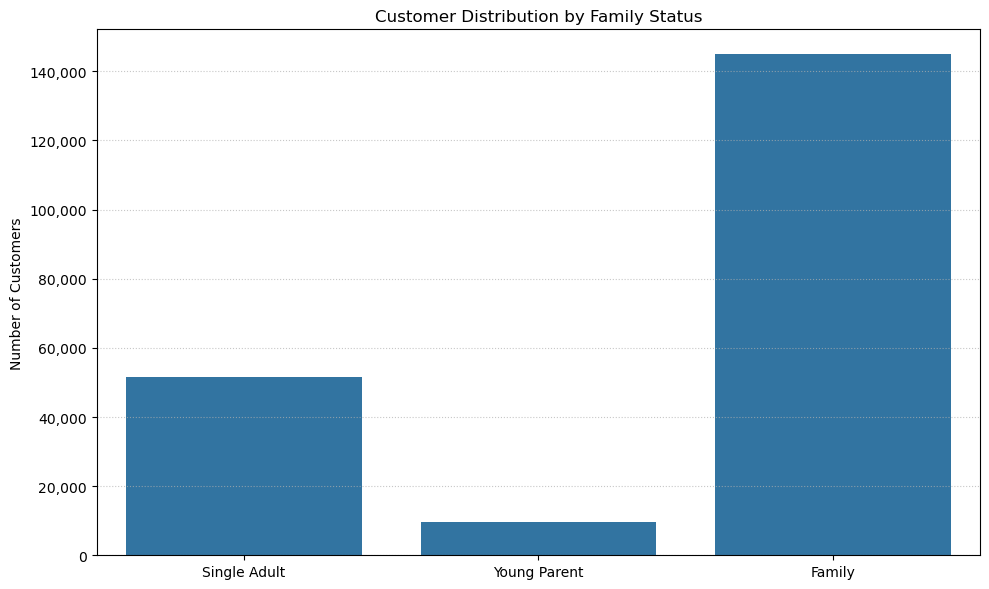

Chart successfully saved at: /Users/davidgriesel/Documents/0 - Analytics Projects/Online Grocery Store


In [58]:
# Define custom order for activity levels
fam_order = ["Single Adult", "Young Parent", "Family"]

# Count occurrences of each activity flag
fam_counts = df_dataset.groupby('family_status')['user_id'].nunique().reset_index()
fam_counts.columns = ['family_status', 'count']

# Ensure sorting by predefined order
fam_counts['family_status'] = pd.Categorical(
    fam_counts['family_status'], categories=fam_order, ordered=True
)
fam_counts = fam_counts.sort_values('family_status')

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bar chart with sorted order
sns.barplot(data=fam_counts, x='family_status', y='count', order=fam_order, ax=ax)

# Set the title and labels
plt.title('Customer Distribution by Family Status')
plt.xlabel('')
plt.ylabel('Number of Customers')

# Format y-axis with thousands separator
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Add dotted gridlines on the y-axis
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Improve layout for readability
plt.tight_layout()

# Save the figure before displaying
plt.savefig(os.path.join(path, '04 - Analysis/Visualisations', '5.4_cust_dist_fam.png'), dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {path}")

# 6. Order Distribution - Customer Profiles

## 6.1. Order Distribution - Activity Flag

In [61]:
# Group by activity_flag and count occurrences
order_counts = df_dataset['activity_flag'].value_counts().reset_index()
order_counts.columns = ['activity_flag', 'count']

# Add a row for the total sum of activity flag occurrences
total_row = pd.DataFrame({'activity_flag': ['Total'], 'count': [order_counts['count'].sum()]})
order_counts = pd.concat([order_counts, total_row], ignore_index=True)

# Display the table
order_counts

,activity_flag,count
0,Moderate Activity,15940760
1,Low Activity,8493912
2,High Activity,7969047
3,Total,32403719


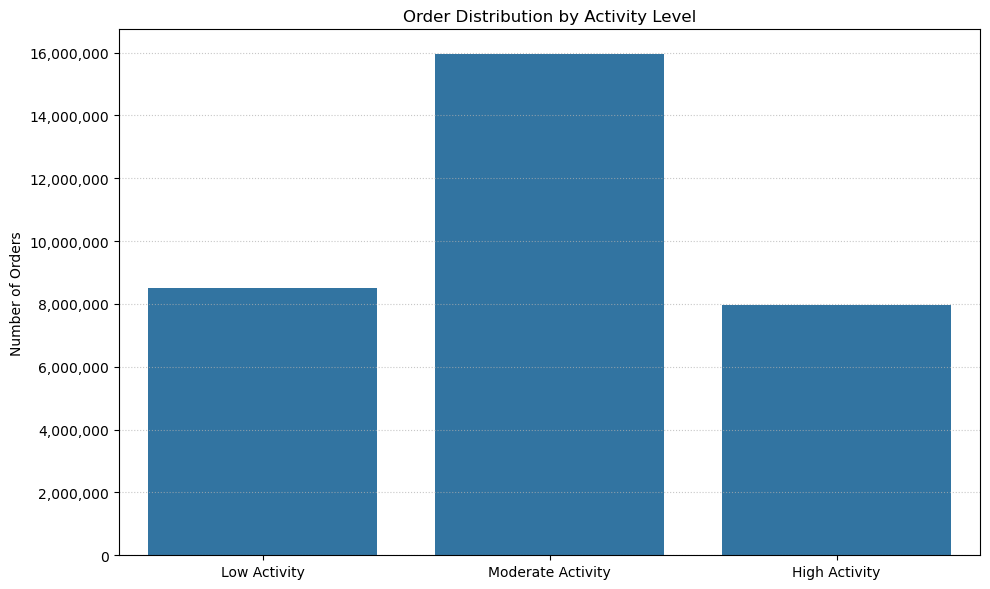

Chart successfully saved at: /Users/davidgriesel/Documents/0 - Analytics Projects/Online Grocery Store


In [62]:
# Define custom order for activity levels
activity_order = ["Low Activity", "Moderate Activity", "High Activity"]

# Count occurrences of each activity flag
activity_counts = df_dataset['activity_flag'].value_counts().reset_index()
activity_counts.columns = ['activity_flag', 'count']

# Ensure sorting by predefined order
activity_counts['activity_flag'] = pd.Categorical(
    activity_counts['activity_flag'], categories=activity_order, ordered=True
)
activity_counts = activity_counts.sort_values('activity_flag')

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bar chart with sorted order
sns.barplot(data=activity_counts, x='activity_flag', y='count', order=activity_order, ax=ax)

# Set the title and labels
plt.title('Order Distribution by Activity Level')
plt.xlabel('')
plt.ylabel('Number of Orders')

# Format y-axis with thousands separator
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Add dotted gridlines on the y-axis
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Improve layout for readability
plt.tight_layout()

# Save the figure before displaying
plt.savefig(os.path.join(path, '04 - Analysis/Visualisations', '6.1_order_dist_activity.png'), dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {path}")

## 6.2. Order Distribution - Spending Flag

In [64]:
# Group by activity_flag and count occurrences
order_counts = df_dataset['spending_flag'].value_counts().reset_index()
order_counts.columns = ['spending_flag', 'count']

# Add a row for the total sum of activity flag occurrences
total_row = pd.DataFrame({'spending_flag': ['Total'], 'count': [order_counts['count'].sum()]})
order_counts = pd.concat([order_counts, total_row], ignore_index=True)

# Display the table
order_counts

,spending_flag,count
0,Moderate Spender,16186179
1,High Spender,8270295
2,Low Spender,7946982
3,Premium Spender,263
4,Total,32403719


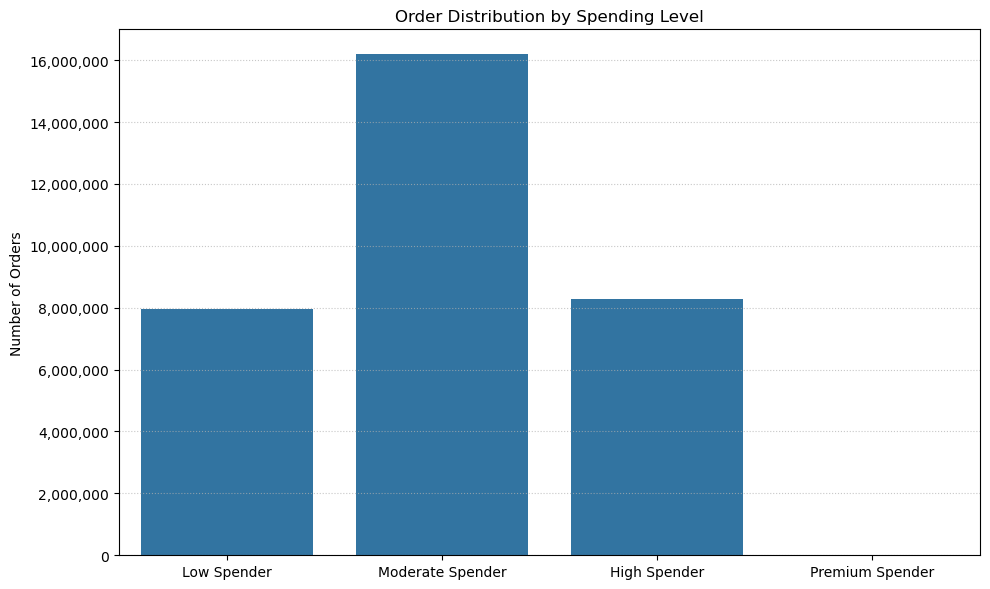

Chart successfully saved at: /Users/davidgriesel/Documents/0 - Analytics Projects/Online Grocery Store


In [169]:
# Define custom order for activity levels
spending_order = ["Low Spender", "Moderate Spender", "High Spender", "Premium Spender"]

# Count occurrences of each activity flag
spending_counts = df_dataset['spending_flag'].value_counts().reset_index()
spending_counts.columns = ['spending_flag', 'count']

# Ensure sorting by predefined order
spending_counts['spending_flag'] = pd.Categorical(
    spending_counts['spending_flag'], categories=spending_order, ordered=True
)
spending_counts = spending_counts.sort_values('spending_flag')

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bar chart with sorted order
sns.barplot(data=spending_counts, x='spending_flag', y='count', order=spending_order, ax=ax)

# Set the title and labels
plt.title('Order Distribution by Spending Level')
plt.xlabel('')
plt.ylabel('Number of Orders')

# Format y-axis with thousands separator
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Add dotted gridlines on the y-axis
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Improve layout for readability
plt.tight_layout()

# Save the figure before displaying
plt.savefig(os.path.join(path, '04 - Analysis/Visualisations', '6.2_order_dist_spending.png'), dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {path}")

## 6.3. Order Distribution - Frequency Flag

In [67]:
# Group by activity_flag and count occurrences
order_counts = df_dataset['frequency_flag'].value_counts().reset_index()
order_counts.columns = ['frequency_flag', 'count']

# Add a row for the total sum of activity flag occurrences
total_row = pd.DataFrame({'frequency_flag': ['Total'], 'count': [order_counts['count'].sum()]})
order_counts = pd.concat([order_counts, total_row], ignore_index=True)

# Display the table
order_counts

,frequency_flag,count
0,Occasional Shopper,14622992
1,Frequent Shopper,10091201
2,Rare Shopper,7689526
3,Total,32403719


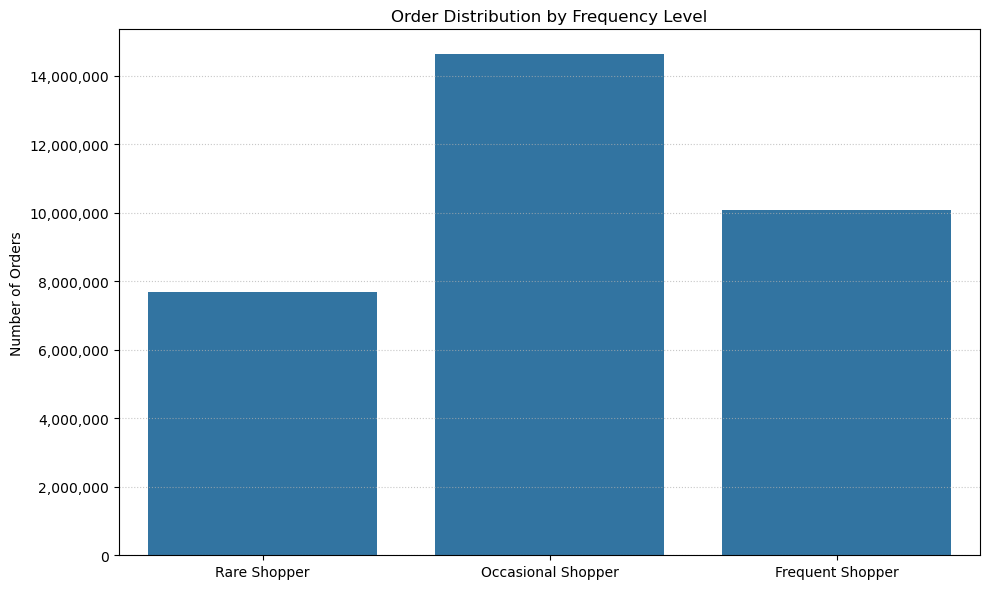

Chart successfully saved at: /Users/davidgriesel/Documents/0 - Analytics Projects/Online Grocery Store


In [68]:
# Define custom order for activity levels
frequency_order = ["Rare Shopper", "Occasional Shopper", "Frequent Shopper"]

# Count occurrences of each activity flag
frequency_counts = df_dataset['frequency_flag'].value_counts().reset_index()
frequency_counts.columns = ['frequency_flag', 'count']

# Ensure sorting by predefined order
frequency_counts['frequency_flag'] = pd.Categorical(
    frequency_counts['frequency_flag'], categories=frequency_order, ordered=True
)
frequency_counts = frequency_counts.sort_values('frequency_flag')

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bar chart with sorted order
sns.barplot(data=frequency_counts, x='frequency_flag', y='count', order=frequency_order, ax=ax)

# Set the title and labels
plt.title('Order Distribution by Frequency Level')
plt.xlabel('')
plt.ylabel('Number of Orders')

# Format y-axis with thousands separator
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Add dotted gridlines on the y-axis
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Improve layout for readability
plt.tight_layout()

# Save the figure before displaying
plt.savefig(os.path.join(path, '04 - Analysis/Visualisations', '6.3_order_dist_frequency.png'), dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {path}")

## 6.4. Order Distribution - Loyalty Flag

In [70]:
# Group by activity_flag and count occurrences
order_counts = df_dataset['loyalty_flag'].value_counts().reset_index()
order_counts.columns = ['loyalty_flag', 'count']

# Add a row for the total sum of activity flag occurrences
total_row = pd.DataFrame({'loyalty_flag': ['Total'], 'count': [order_counts['count'].sum()]})
order_counts = pd.concat([order_counts, total_row], ignore_index=True)

# Display the table
order_counts

,loyalty_flag,count
0,Moderate Loyalty,21255126
1,High Loyalty,6127264
2,Low Loyalty,5021329
3,Total,32403719


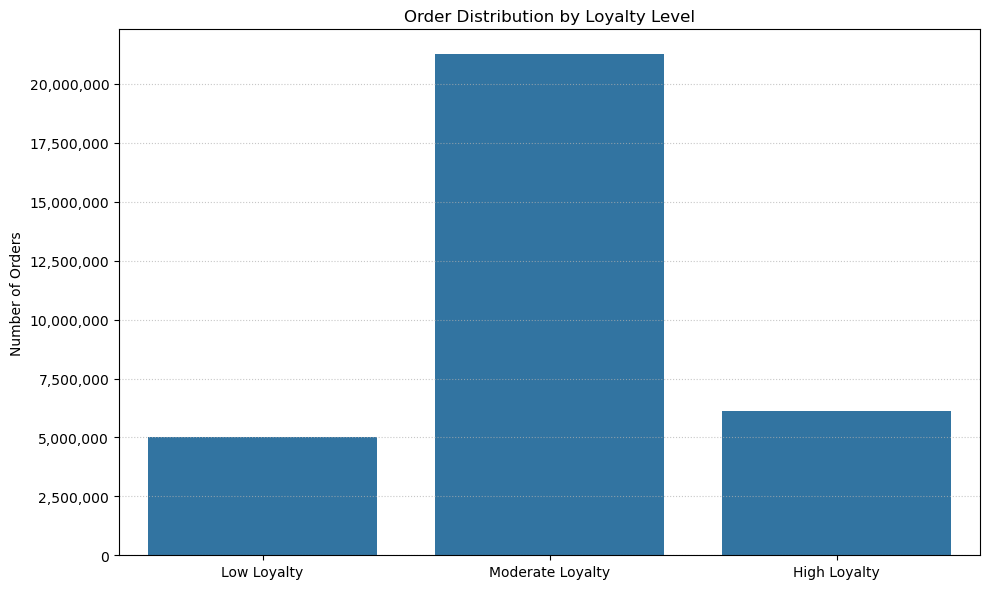

Chart successfully saved at: /Users/davidgriesel/Documents/0 - Analytics Projects/Online Grocery Store


In [71]:
# Define custom order for activity levels
loyalty_order = ["Low Loyalty", "Moderate Loyalty", "High Loyalty"]

# Count occurrences of each activity flag
loyalty_counts = df_dataset['loyalty_flag'].value_counts().reset_index()
loyalty_counts.columns = ['loyalty_flag', 'count']

# Ensure sorting by predefined order
loyalty_counts['loyalty_flag'] = pd.Categorical(
    loyalty_counts['loyalty_flag'], categories=loyalty_order, ordered=True
)
loyalty_counts = loyalty_counts.sort_values('loyalty_flag')

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bar chart with sorted order
sns.barplot(data=loyalty_counts, x='loyalty_flag', y='count', order=loyalty_order, ax=ax)

# Set the title and labels
plt.title('Order Distribution by Loyalty Level')
plt.xlabel('')
plt.ylabel('Number of Orders')

# Format y-axis with thousands separator
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Add dotted gridlines on the y-axis
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Improve layout for readability
plt.tight_layout()

# Save the figure before displaying
plt.savefig(os.path.join(path, '04 - Analysis/Visualisations', '6.4_order_dist_loyalty.png'), dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {path}")

# 7. Order Distribution - Customer Demographics

## 7.1. Order Distribution - Region

In [74]:
# Group by activity_flag and count occurrences
order_counts = df_dataset['region'].value_counts().reset_index()
order_counts.columns = ['region', 'count']

# Add a row for the total sum of activity flag occurrences
total_row = pd.DataFrame({'region': ['Total'], 'count': [order_counts['count'].sum()]})
order_counts = pd.concat([order_counts, total_row], ignore_index=True)

# Display the table
order_counts

,region,count
0,South,10791513
1,West,8292641
2,Midwest,7597015
3,Northeast,5722550
4,Total,32403719


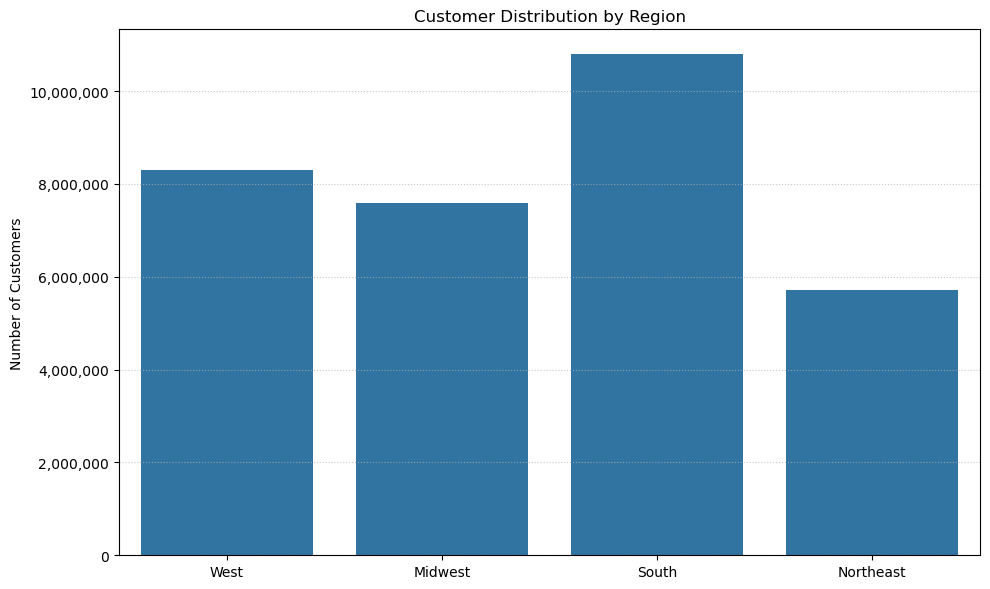

Chart successfully saved at: /Users/davidgriesel/Documents/0 - Analytics Projects/Online Grocery Store


In [75]:
# Define custom order for activity levels
region_order = ["West", "Midwest", "South", "Northeast"]

# Count occurrences of each activity flag
region_counts = df_dataset['region'].value_counts().reset_index()
region_counts.columns = ['region', 'count']

# Ensure sorting by predefined order
region_counts['region'] = pd.Categorical(
    region_counts['region'], categories=region_order, ordered=True
)
region_counts = region_counts.sort_values('region')

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bar chart with sorted order
sns.barplot(data=region_counts, x='region', y='count', order=region_order, ax=ax)

# Set the title and labels
plt.title('Customer Distribution by Region')
plt.xlabel('')
plt.ylabel('Number of Customers')

# Format y-axis with thousands separator
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Add dotted gridlines on the y-axis
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Improve layout for readability
plt.tight_layout()

# Save the figure before displaying
plt.savefig(os.path.join(path, '04 - Analysis/Visualisations', '7.1_order_dist_region.png'), dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {path}")

## 7.2. Order Distribution - Income

In [77]:
# Group by activity_flag and count occurrences
order_counts = df_dataset['income_profile'].value_counts().reset_index()
order_counts.columns = ['income_profile', 'count']

# Add a row for the total sum of activity flag occurrences
total_row = pd.DataFrame({'income_profile': ['Total'], 'count': [order_counts['count'].sum()]})
order_counts = pd.concat([order_counts, total_row], ignore_index=True)

# Display the table
order_counts

,income_profile,count
0,Middle Income,15672551
1,High Income,8630641
2,Low Income,8100527
3,Total,32403719


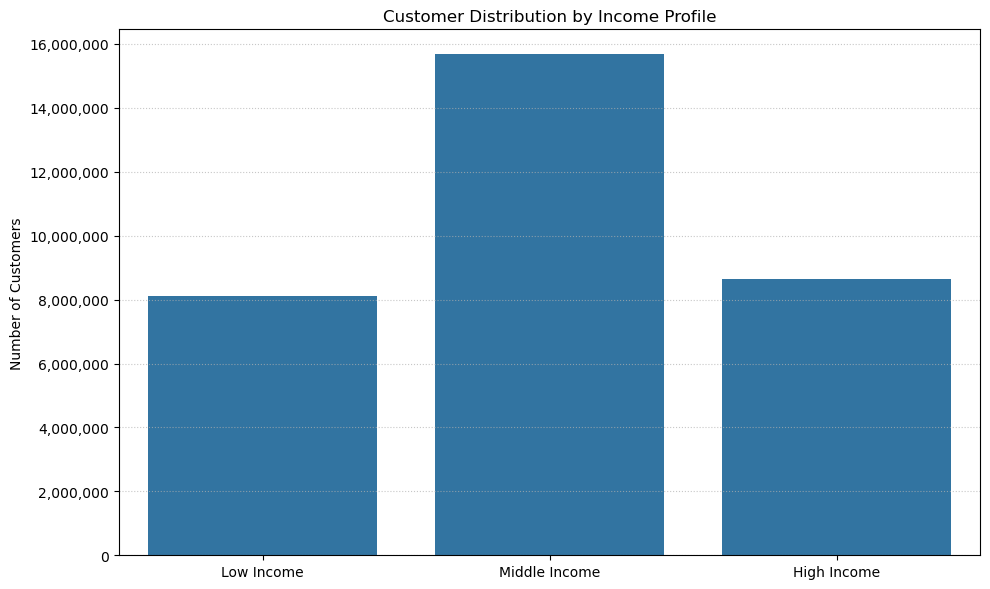

Chart successfully saved at: /Users/davidgriesel/Documents/0 - Analytics Projects/Online Grocery Store


In [78]:
# Define custom order for activity levels
income_order = ["Low Income", "Middle Income", "High Income"]

# Count occurrences of each activity flag
income_counts = df_dataset['income_profile'].value_counts().reset_index()
income_counts.columns = ['income_profile', 'count']

# Ensure sorting by predefined order
income_counts['income_profile'] = pd.Categorical(
    income_counts['income_profile'], categories=income_order, ordered=True
)
income_counts = income_counts.sort_values('income_profile')

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bar chart with sorted order
sns.barplot(data=income_counts, x='income_profile', y='count', order=income_order, ax=ax)

# Set the title and labels
plt.title('Customer Distribution by Income Profile')
plt.xlabel('')
plt.ylabel('Number of Customers')

# Format y-axis with thousands separator
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Add dotted gridlines on the y-axis
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Improve layout for readability
plt.tight_layout()

# Save the figure before displaying
plt.savefig(os.path.join(path, '04 - Analysis/Visualisations', '7.2_order_dist_income.png'), dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {path}")

## 7.3. Order Distribution - Age

In [80]:
# Group by activity_flag and count occurrences
order_counts = df_dataset['age_profile'].value_counts().reset_index()
order_counts.columns = ['age_profile', 'count']

# Add a row for the total sum of activity flag occurrences
total_row = pd.DataFrame({'age_profile': ['Total'], 'count': [order_counts['count'].sum()]})
order_counts = pd.concat([order_counts, total_row], ignore_index=True)

# Display the table
order_counts

,age_profile,count
0,Adult,10155790
1,Middle Aged,10115107
2,Senior,8087791
3,Young Adult,4045031
4,Total,32403719


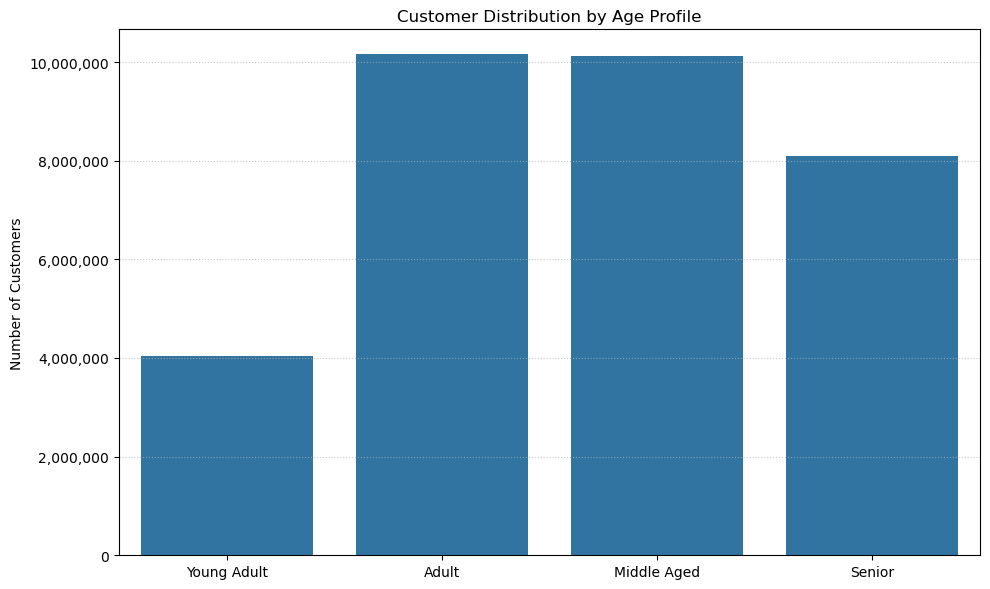

Chart successfully saved at: /Users/davidgriesel/Documents/0 - Analytics Projects/Online Grocery Store


In [81]:
# Define custom order for activity levels
age_order = ["Young Adult", "Adult", "Middle Aged", "Senior"]

# Count occurrences of each activity flag
age_counts = df_dataset['age_profile'].value_counts().reset_index()
age_counts.columns = ['age_profile', 'count']

# Ensure sorting by predefined order
age_counts['age_profile'] = pd.Categorical(
    age_counts['age_profile'], categories=age_order, ordered=True
)
age_counts = age_counts.sort_values('age_profile')

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bar chart with sorted order
sns.barplot(data=age_counts, x='age_profile', y='count', order=age_order, ax=ax)

# Set the title and labels
plt.title('Customer Distribution by Age Profile')
plt.xlabel('')
plt.ylabel('Number of Customers')

# Format y-axis with thousands separator
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Add dotted gridlines on the y-axis
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Improve layout for readability
plt.tight_layout()

# Save the figure before displaying
plt.savefig(os.path.join(path, '04 - Analysis/Visualisations', '7.3_order_dist_age.png'), dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {path}")

## 7.4. Order Distribution - Family Status

In [83]:
# Group by activity_flag and count occurrences
order_counts = df_dataset['family_status'].value_counts().reset_index()
order_counts.columns = ['family_status', 'count']

# Add a row for the total sum of activity flag occurrences
total_row = pd.DataFrame({'family_status': ['Total'], 'count': [order_counts['count'].sum()]})
order_counts = pd.concat([order_counts, total_row], ignore_index=True)

# Display the table
order_counts

,family_status,count
0,Family,22755877
1,Single Adult,8097297
2,Young Parent,1550545
3,Total,32403719


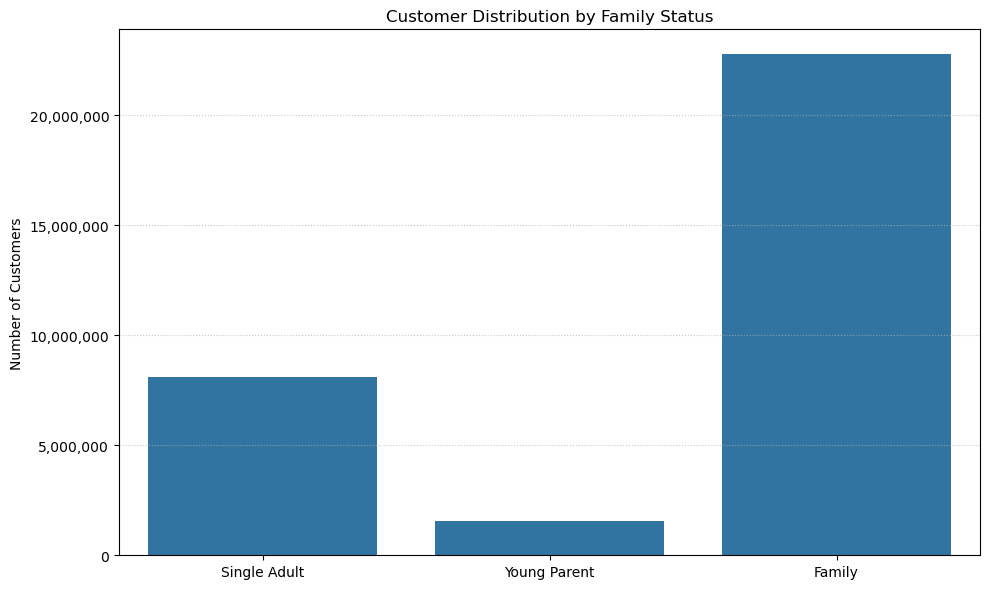

Chart successfully saved at: /Users/davidgriesel/Documents/0 - Analytics Projects/Online Grocery Store


In [84]:
# Define custom order for activity levels
family_order = ["Single Adult", "Young Parent", "Family"]

# Count occurrences of each activity flag
family_counts = df_dataset['family_status'].value_counts().reset_index()
family_counts.columns = ['family_status', 'count']

# Ensure sorting by predefined order
family_counts['family_status'] = pd.Categorical(
    family_counts['family_status'], categories=family_order, ordered=True
)
family_counts = family_counts.sort_values('family_status')

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bar chart with sorted order
sns.barplot(data=family_counts, x='family_status', y='count', order=family_order, ax=ax)

# Set the title and labels
plt.title('Customer Distribution by Family Status')
plt.xlabel('')
plt.ylabel('Number of Customers')

# Format y-axis with thousands separator
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Add dotted gridlines on the y-axis
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Improve layout for readability
plt.tight_layout()

# Save the figure before displaying
plt.savefig(os.path.join(path, '04 - Analysis/Visualisations', '7.4_order_dist_fam.png'), dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {path}")

# 8. Order Behaviour